# **Data Collection and Preprocessing**

# **Importing the Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Importing the Dataset**

In [ ]:
data = pd.read_excel('/content/Crude Oil Prices Daily.xlsx')

In [ ]:
data.head()

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


# **Handling Missing Data**

In [ ]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [ ]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [ ]:
data.dropna(axis=0, inplace=True)

In [ ]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [ ]:
data_oil = data.reset_index()['Closing Value']

In [ ]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_oil = scaler.fit_transform(np.array(data_oil).reshape(-1,1))

# **Data Visualization**


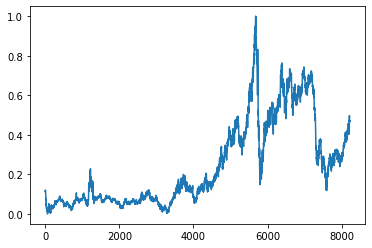

In [ ]:
plt.plot(data_oil)

# **Splitting Data Into Train And Test**

In [ ]:
training_size = int(len(data_oil)*0.65)
test_size = len(data_oil) - training_size
train_data, test_data = data_oil[0:training_size,:], data_oil[training_size:len(data_oil),:1]

In [ ]:
training_size, test_size

(5340, 2876)

In [ ]:
train_data.shape

(5340, 1)

# **Creating A Dataset With Sliding Windows**

In [ ]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset) - time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape, y_train.shape)

(5329, 10) (5329,)


In [ ]:
print(X_test.shape, ytest.shape)

(2865, 10) (2865,)


In [ ]:
X_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# **Model Building**

# **Importing The Model Building Libraries**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

# **Initializing The Model**

In [ ]:
model = Sequential()

# **Adding LSTM Layers**

In [ ]:
model.add(LSTM(50, return_sequences=True, input_shape=(10,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))

# **Adding Output Layers**


In [ ]:
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# **Configure The Learning Process**



In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

# **Train The Model**



In [ ]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs=50, batch_size=64, verbose=1)

Epoch 1/50
84/84 [==============================] - 9s 42ms/step - loss: 0.0018 - val_loss: 9.8627e-04
Epoch 2/50
84/84 [==============================] - 2s 26ms/step - loss: 1.2840e-04 - val_loss: 7.8349e-04
Epoch 3/50
84/84 [==============================] - 2s 27ms/step - loss: 1.2931e-04 - val_loss: 7.6868e-04
Epoch 4/50
84/84 [==============================] - 2s 26ms/step - loss: 1.2753e-04 - val_loss: 7.8465e-04
Epoch 5/50
84/84 [==============================] - 2s 26ms/step - loss: 1.3176e-04 - val_loss: 8.3704e-04
Epoch 6/50
84/84 [==============================] - 2s 26ms/step - loss: 1.3144e-04 - val_loss: 7.7508e-04
Epoch 7/50
84/84 [==============================] - 2s 26ms/step - loss: 1.2721e-04 - val_loss: 8.3512e-04
Epoch 8/50
84/84 [==============================] - 2s 26ms/step - loss: 1.2070e-04 - val_loss: 7.8521e-04
Epoch 9/50
84/84 [==============================] - 2s 26ms/step - loss: 1.1302e-04 - val_loss: 0.0011
Epoch 10/50
84/84 [==========================

# **Model Evaluation**



In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict.shape, test_predict.shape

90/90 [==============================] - 0s 5ms/step


((5329, 1), (2865, 1))

In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.005620035171812541

In [ ]:
math.sqrt(mean_squared_error(ytest, test_predict))

0.013970680158126952

# **Save The Model**



In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save("crude_oil.h5")

# **Test The Model**



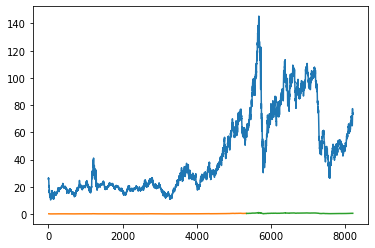

In [ ]:
look_back = 10
trainPredictPlot = np.empty_like(data_oil)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(data_oil)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data_oil)-1, :] = test_predict

plt.plot(scaler.inverse_transform(data_oil))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

2876

In [ ]:
x_input = test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [ ]:
lst_output = []
n_steps = 10
i=0
while(i<10):
  if(len(temp_input)>10):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i, x_input))
    x_input = x_input.reshape(1,-1)
    x_input = x_input.reshape((1, n_steps, 1))

    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i, yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input = temp_input[1:]

    lst_output.extend(yhat.tolist())
    i = i+1
  else:
    x_input = x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1


[0.47496077]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47496077]
1 day output [[0.47871187]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47496077 0.47871187]
2 day output [[0.48209623]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47496077 0.47871187 0.48209623]
3 day output [[0.48472482]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47496077 0.47871187 0.48209623 0.48472482]
4 day output [[0.4868469]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47496077
 0.47871187 0.48209623 0.48472482 0.48684689]
5 day output [[0.48841396]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47496077 0.47871187
 0.48209623 0.48472482 0.48684689 0.48841396]
6 day output [[0.4896311]]
7 day input [0.46497853 0.47038353 0.47149415 0.47496077 0.47871187 

In [ ]:
day_new = np.arange(1,11)
day_pred = np.arange(11,21)

In [ ]:
len(data_oil)

8216

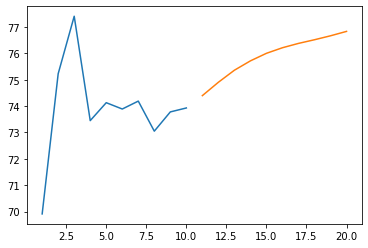

In [ ]:
plt.plot(day_new, scaler.inverse_transform(data_oil[8206:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

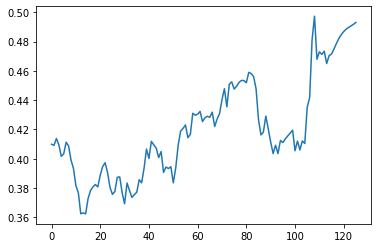

In [ ]:
df3 = data_oil.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

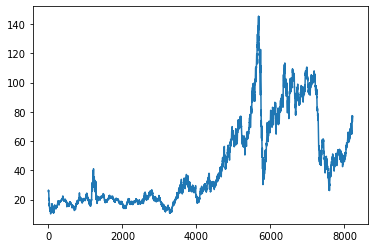

In [ ]:
df3 = scaler.inverse_transform(df3).tolist()
plt.plot(df3)

In [ ]:
!tar -zcvf crude-oil-price-prediction.tgz crude_oil.h5

crude_oil.h5


# **IBM Deployment**

In [ ]:
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 538 kB 4.1 MB/s 
     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 132 kB 52.7 MB/s 
     |████████████████████████████████| 9.9 MB 53.9 MB/s 
     |████████████████████████████████| 79 kB 7.9 MB/s 
     |████████████████████████████████| 140 kB 56.8 MB/s 
     |████████████████████████████████| 956 kB 44.6 MB/s 
     |████████████████████████████████| 135 kB 61.5 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73931 sha256=52b17ee688671b39f4431a1264c62bfca0c9e2274830edd3cfa791355cb062fc
  Stored in directory: /root/.cache/pip/wheels/ec/94/29/2b57327cf00664b6614304f7958abd29d77ea0e5bbece2ea57
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-none-any.whl size=562962 sha256=70162d9b07a

In [ ]:
!pip install ibm_watson_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.0 MB/s 
     |████████████████████████████████| 51 kB 719 kB/s 
     |████████████████████████████████| 824 kB 41.9 MB/s 
     |████████████████████████████████| 133 kB 51.1 MB/s 
     |████████████████████████████████| 547 kB 40.8 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72563 sha256=688c6435ff4cb3b94b69fdc7b22cd2a1e7c6700ffbf5e8a3d86056709d01f5dd
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=c859d75b63509106d6e07974e3e3c5cc5b217952b1c7e6101be6a85bf0a3ec87
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [ ]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url":"https://eu-gb.ml.cloud.ibm.com",
    "apikey":"XaiBJfyOLdZqFSL97wZAhSDoUywnhzRwIepZ9Xdasmbi"
}

client = APIClient(wml_credentials)

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [ ]:
client

In [ ]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:eu-gb:a/332fca1d1d9f4d69bad0b65ec92b870e:629e5baf-6041-4ea5-a258-a6c82eee2165::',
      'guid': '629e5baf-6041-4ea5-a258-a6c82eee2165',
      'name': 'Watson Machine Learning-65',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'D1_Deployment',
    'scope': {'bss_account_id': '332fca1d1d9f4d69bad0b65ec92b870e'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '19b9b691-1125-4bcd-88e0-9e5b5045cd94',
      'bucket_region': 'eu-gb-standard',
      'credentials': {'admin': {'access_key_id': 'e0ea7937c60a43998fb9aa5ea1a88a20',
        'api_key': 'wZW0-vu69-DcqoVxMf4l9ZMx34r42N32f9Z6TJji7yt3',
        'secret_access_key': '1ea4d1604712aaedc5093d4d5721a1f243ce929ce8bdc0f7',
        'service_id': 'ServiceId-f09d6562-e28c-4c02-a901-9fa0a92379f0'},
       'editor': {'access_key_id': 'f35104205bc04a4e8ccba2146e49dac0',
        'api

In [ ]:
client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------  ------------------------
ID                                    NAME           CREATED
70b3b461-5ca0-4928-b0f6-9c4b231975a4  D1_Deployment  2022-11-18T17:36:43.188Z
------------------------------------  -------------  ------------------------


In [ ]:
space_uid = "70b3b461-5ca0-4928-b0f6-9c4b231975a4"
space_uid

'70b3b461-5ca0-4928-b0f6-9c4b231975a4'

In [ ]:
client.set.default_space(space_uid)

'SUCCESS'

In [ ]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")

In [ ]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [ ]:
model_details = client.repository.store_model(model="crude-oil-price-prediction.tgz", meta_props={
    client.repository.ModelMetaNames.NAME:"D1 Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-18T17:52:16.747Z',
  'id': '7478d68b-f845-49c0-93d0-d6b11788c095',
  'modified_at': '2022-11-18T17:52:21.510Z',
  'name': 'D1 Model',
  'owner': 'IBMid-6640045MO2',
  'resource_key': '8b4175e5-b2eb-42b7-962b-14d5c4341303',
  'space_id': '70b3b461-5ca0-4928-b0f6-9c4b231975a4'},
 'system': {'warnings': []}}

In [ ]:
model_id = client.repository.get_model_id(model_details)
model_id

'7478d68b-f845-49c0-93d0-d6b11788c095'

In [ ]:
client.repository.download(model_id, "D1_Model.tgz")

Successfully saved model content to file: 'D1_Model.tgz'


'/content/D1_Model.tgz'